In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

/Users/yanwuyang/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
/Users/yanwuyang/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
mobiledf = pd.read_csv('Amazon_Unlocked_Mobile.csv')
mobiledf.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [3]:
mobiledf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413778 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [37]:
Brand_Name = mobiledf['Brand Name'].str.upper()
Brand_Name.value_counts().head(10)

SAMSUNG       68720
BLU           63256
APPLE         58187
LG            22423
BLACKBERRY    17929
NOKIA         16841
MOTOROLA      13447
HTC           12927
CNPGD         12613
OTTERBOX       7989
Name: Brand Name, dtype: int64

In [34]:
Product_Name = mobiledf['Product Name'].str.upper()
Product_Name.value_counts().head(10)

APPLE IPHONE 4S 8GB UNLOCKED SMARTPHONE W/ 8MP CAMERA, WHITE (CERTIFIED REFURBISHED)          1451
APPLE MF259LL/A - IPHONE 4S 8GB / 8MP CAMERA - UNLOCKED - BLACK (CERTIFIED REFURBISHED)       1241
BLU STUDIO 5.0 C HD UNLOCKED CELLPHONE, BLACK                                                 1194
OTTERBOX IPHONE 5/5S/SE DEFENDER CASE W/ DROP AND DUST PROCTECTION - REALTREE AP PINK         1129
MOTOROLA MOTO E (1ST GENERATION) - BLACK - 4 GB - GLOBAL GSM UNLOCKED PHONE                   1127
APPLE IPHONE 5S 32GB (SILVER) - AT&T                                                          1118
BLU ENERGY X PLUS SMARTPHONE - WITH 4000 MAH SUPER BATTERY- US GSM UNLOCKED - GREY            1111
SAMSUNG GALAXY S DUOS II S7582 DUAL SIM FACTORY UNLOCKED INTERNATIONAL VERSION - BLACK        1109
SAMSUNG GALAXY S DUOS II GT-S7582 FACTORY UNLOCKED CELLPHONE, INTERNATIONAL VERSION, WHITE    1108
SAMSUNG GALAXY S DUOS GT-S7562 GSM UNLOCKED TOUCHSCREEN 5MP CAMERA SMARTPHONE WHITE           1096
Name: Prod

In [5]:
mobiledf1 = mobiledf.loc[lambda mobiledf:mobiledf['Price'] < 144,:]
mobiledf2 = mobiledf.loc[lambda mobiledf:mobiledf['Price'] >= 144,:]

In [6]:
mobiledf1.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
118,"(LANDVO) 5.0"" Capacitive Touch MTK6582 Quad Co...",HTM,69.99,5,exelente,0.0
119,"(LANDVO) 5.0"" Capacitive Touch MTK6582 Quad Co...",HTM,69.99,5,phone works great for the price although when ...,1.0
120,"(LANDVO) 5.0"" Capacitive Touch MTK6582 Quad Co...",HTM,69.99,5,Keeping in mind that this is a sub $100 phone ...,16.0
121,"(LANDVO) 5.0"" Capacitive Touch MTK6582 Quad Co...",HTM,69.99,5,Is a good product That I recomended it has all...,9.0
122,"(LANDVO) 5.0"" Capacitive Touch MTK6582 Quad Co...",HTM,69.99,5,my autistic son is in his glory lol thank you ...,0.0
123,"(LANDVO) 5.0"" Capacitive Touch MTK6582 Quad Co...",HTM,69.99,4,"All around good phone, not glitchy at all, or ...",0.0
124,"(LANDVO) 5.0"" Capacitive Touch MTK6582 Quad Co...",HTM,69.99,4,I have no problem taking the phone to straight...,0.0
125,"(LANDVO) 5.0"" Capacitive Touch MTK6582 Quad Co...",HTM,69.99,2,Delivery was fast. The overall quality of the ...,0.0
126,"(LANDVO) 5.0"" Capacitive Touch MTK6582 Quad Co...",HTM,69.99,5,Perfect,0.0
127,"(LANDVO) 5.0"" Capacitive Touch MTK6582 Quad Co...",HTM,69.99,1,Worked OK for awhile now every time I tap the ...,0.0


In [7]:
mobiledf[mobiledf['Reviews'].duplicated(keep = False)].sort_values('Reviews').head(8)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
81165,"ASUS ZenFone 2 Unlocked Cellphone, 64GB, Black...",Asus,235.16,4,"!!!! Great phone move fast everything , but th...",0.0
81591,"ASUS ZenFone 2 Unlocked Cellphone, 64GB, Black...",Asus,235.16,4,"!!!! Great phone move fast everything , but th...",0.0
182481,Figo Virtue 4.0 - Unlocked Dual Sim Smartphone...,FiGo,50.96,5,""" Great phone for a great price"" I love it!",0.0
182358,Figo Virtue 4.0 - Unlocked Dual Sim Smartphone...,FiGo,50.96,5,""" Great phone for a great price"" I love it!",0.0
182285,Figo Virtue 4.0 - Unlocked Dual Sim Smartphone...,FIGO,49.99,5,""" Great phone for a great price"" I love it!",0.0
182059,Figo Virtue 4.0 - Unlocked Dual Sim Smartphone...,FIGO,57.20,5,""" Great phone for a great price"" I love it!",0.0
182551,Figo Virtue II 4.0 - Unlocked Dual Sim Smartph...,FIGO,49.51,5,""" Great phone for a great price"" I love it!",0.0
182009,Figo Virtue 4.0 - Unlocked Dual Sim Smartphone...,FIGO,52.88,5,""" Great phone for a great price"" I love it!",0.0


In [8]:
mobiledf2.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [39]:
top_10_brand_list=['Apple',
 'HTC',
 'BlackBerry',
 'BLU',
 'Samsung',
 'Motorola',
 'CNPGD',
 'LG',
 'Nokia',
 'OtterBox']

In [41]:
df_small=mobiledf.loc[mobiledf['Brand Name'].isin(top_10_brand_list)]
pivot = pd.pivot_table(df_small,
            values = ['Rating'],
            index =  ['Brand Name'], 
                       columns= [],
                       aggfunc=[np.mean, np.std], 
                       margins=True, fill_value=0).sort_values(by=('mean', 'Rating'), ascending=False).fillna('')
pivot

,mean,std
,Rating,Rating
Brand Name,,
OtterBox,4.383778,1.164561
Samsung,3.962356,1.485313
Apple,3.924415,1.576060
LG,3.841460,1.534323
All,3.832811,1.540667
Nokia,3.819291,1.490946
Motorola,3.812849,1.524914
BLU,3.792262,1.502263


/Users/yanwuyang/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


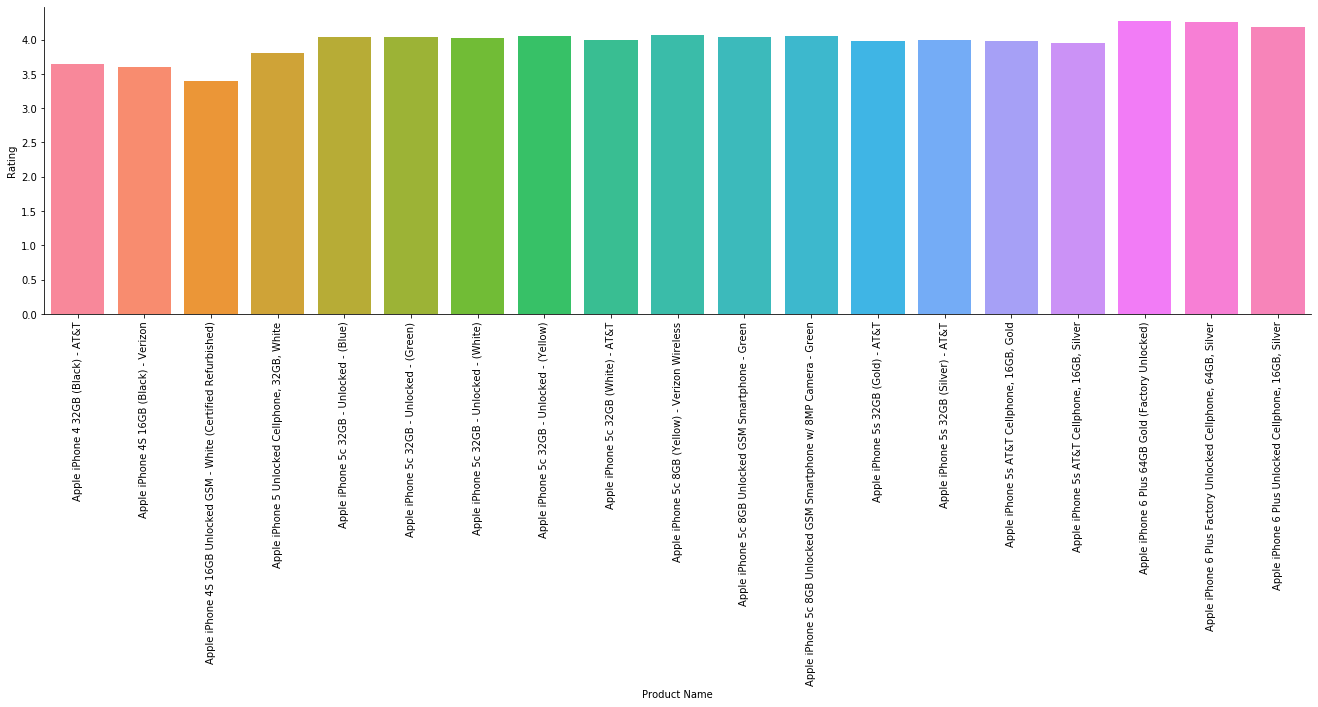

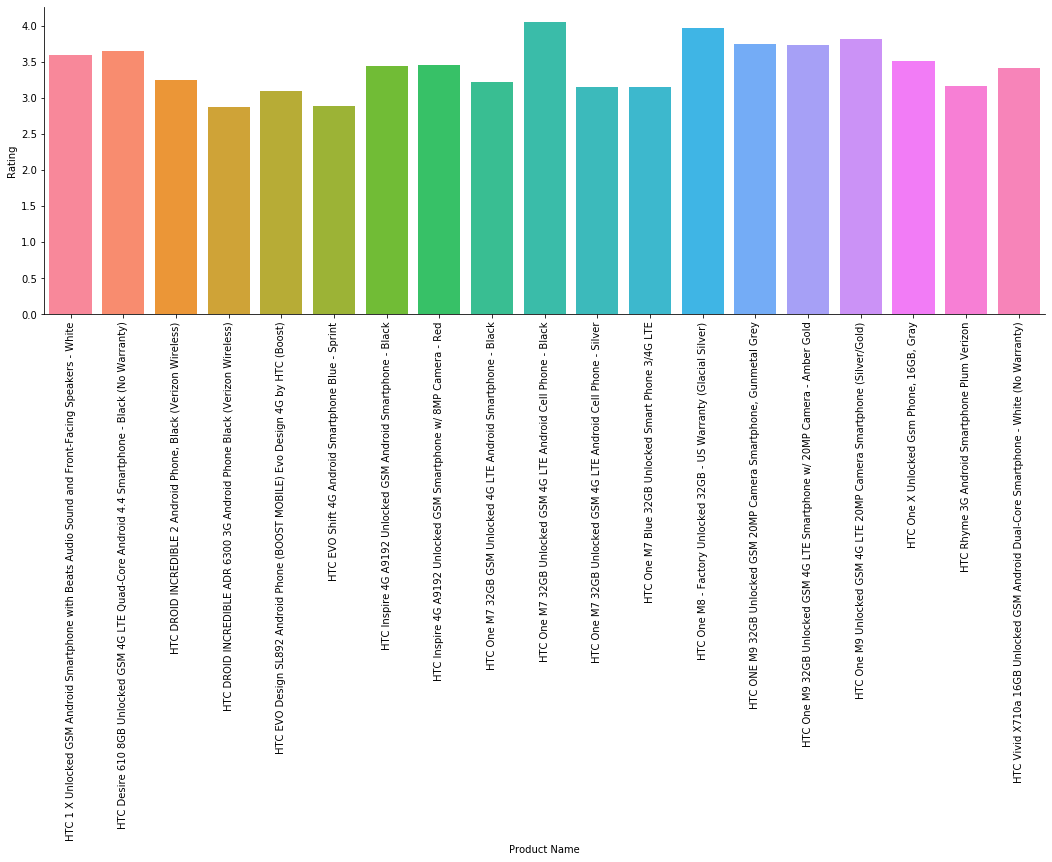

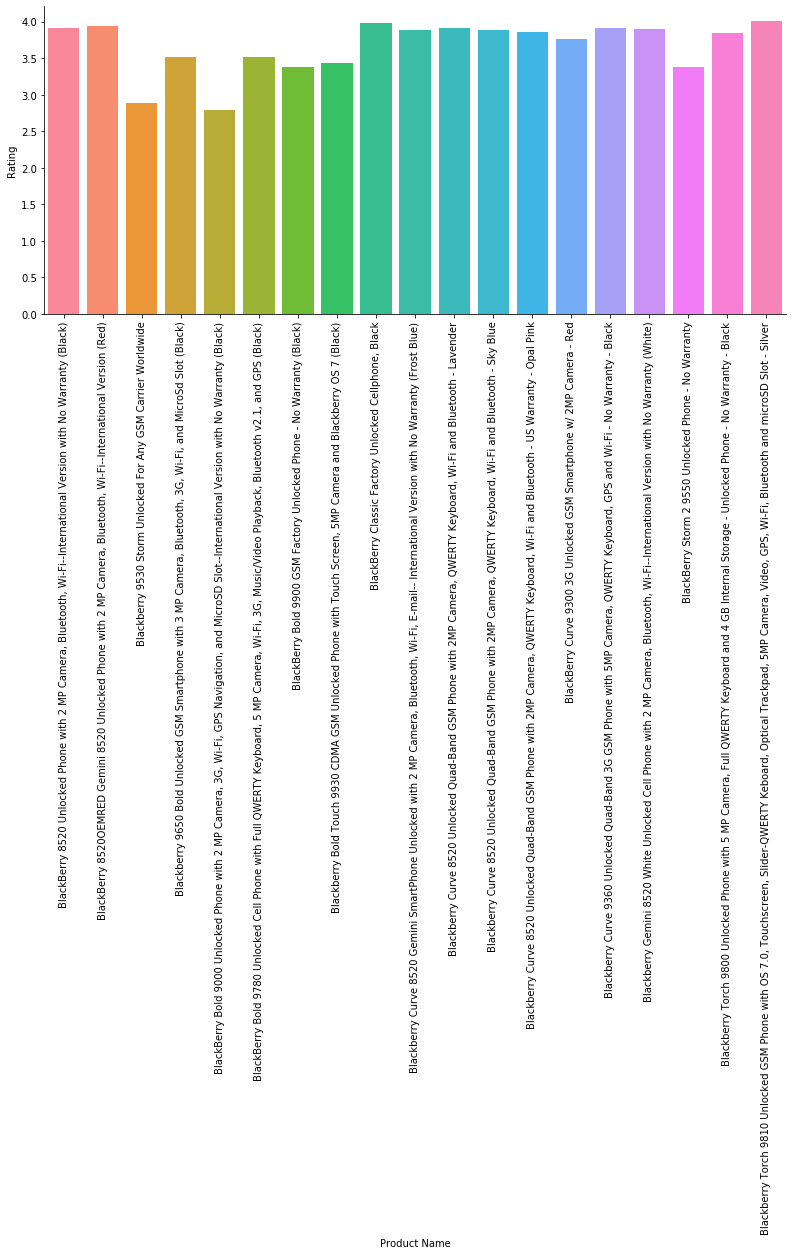

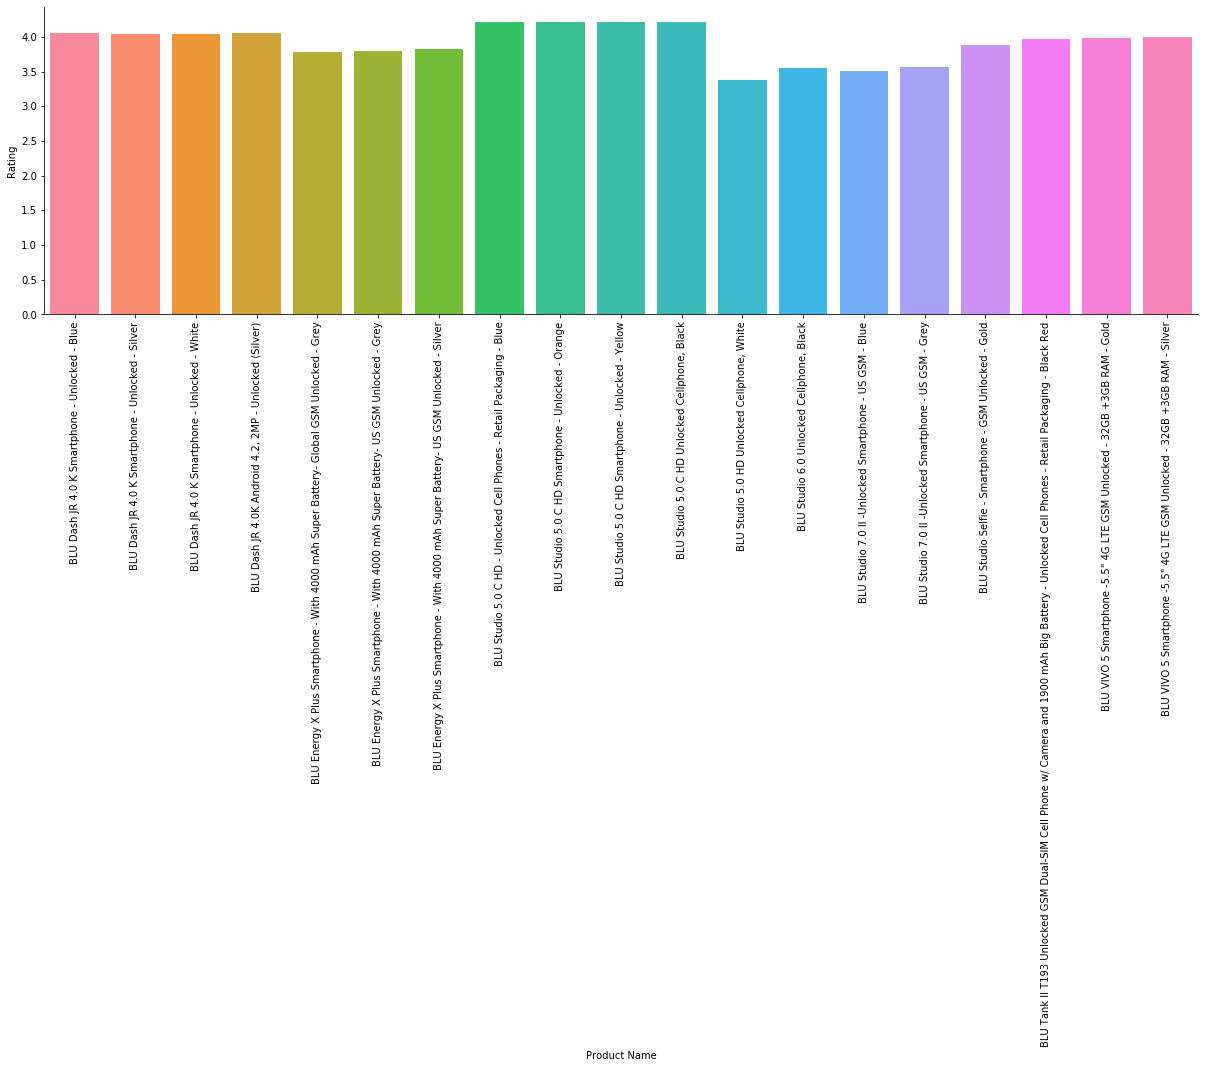

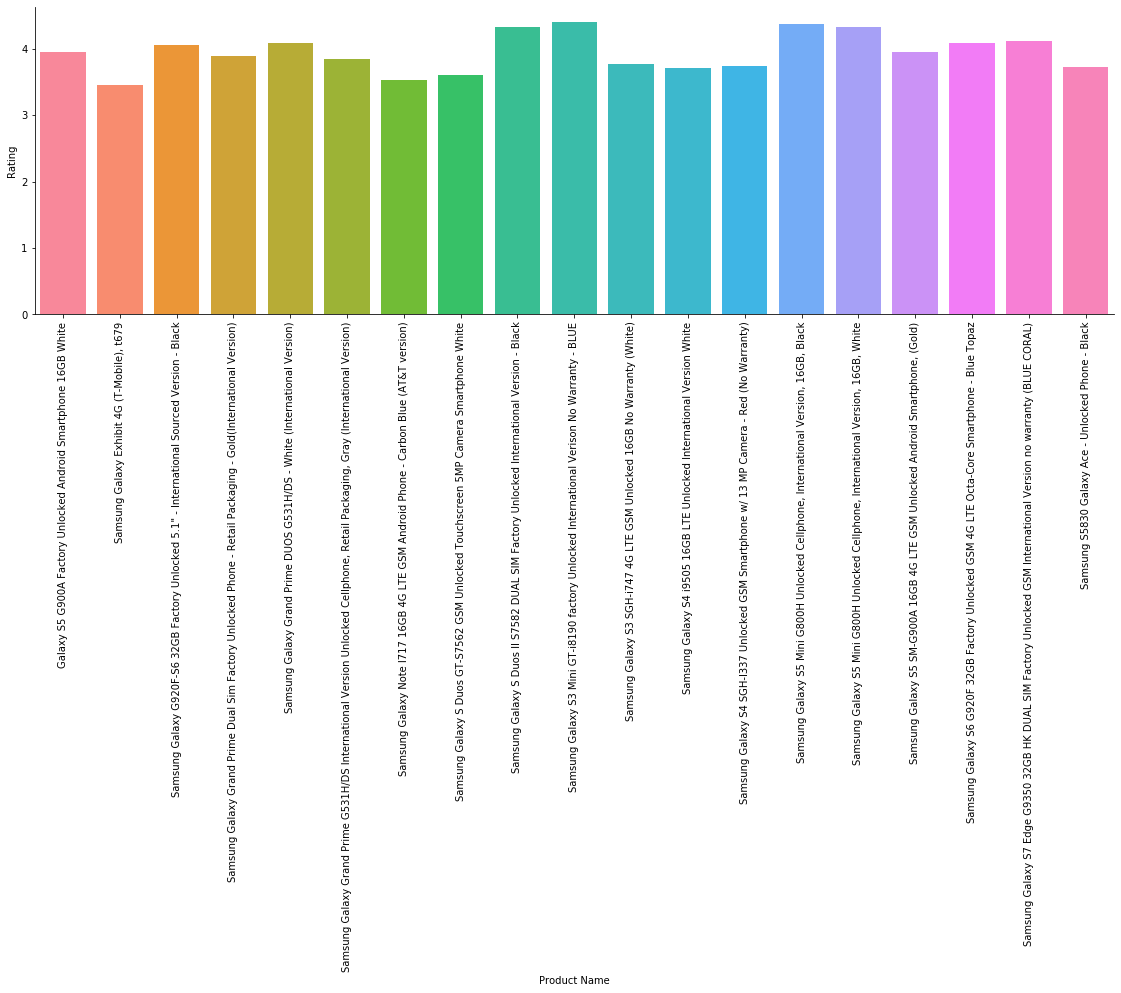

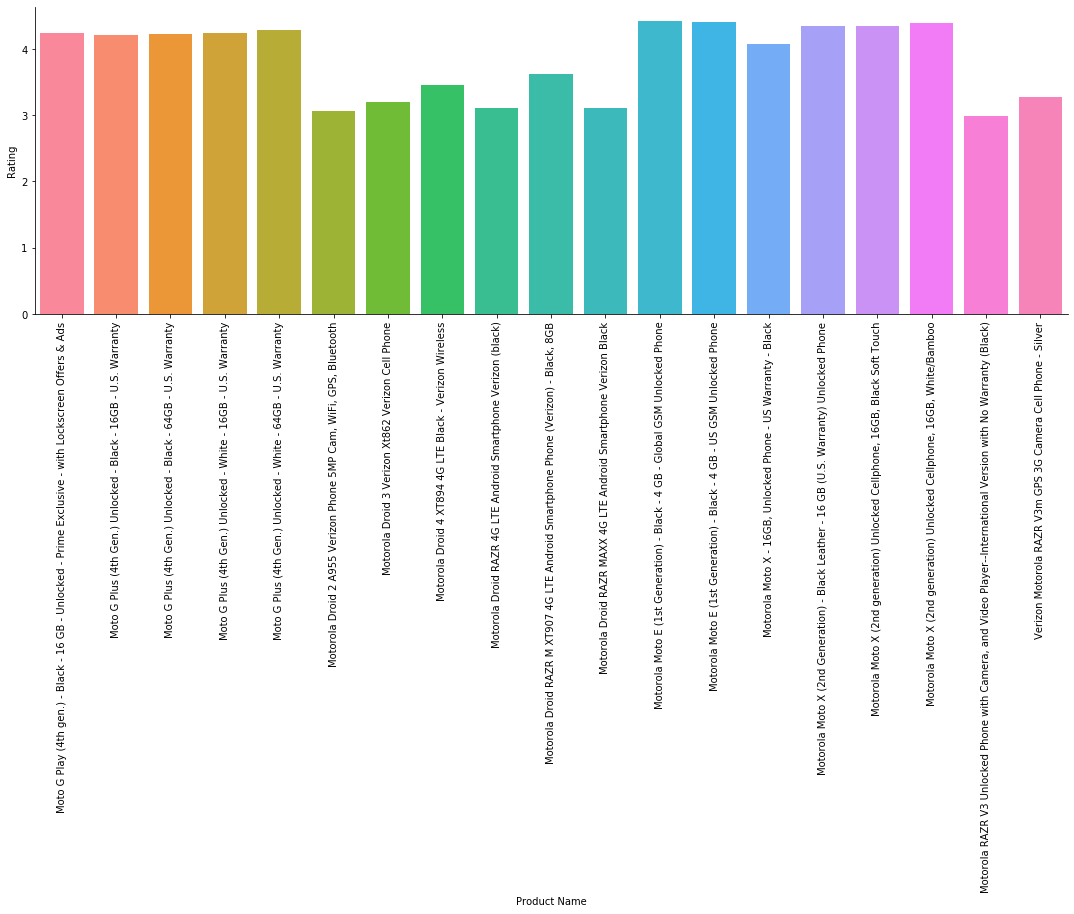

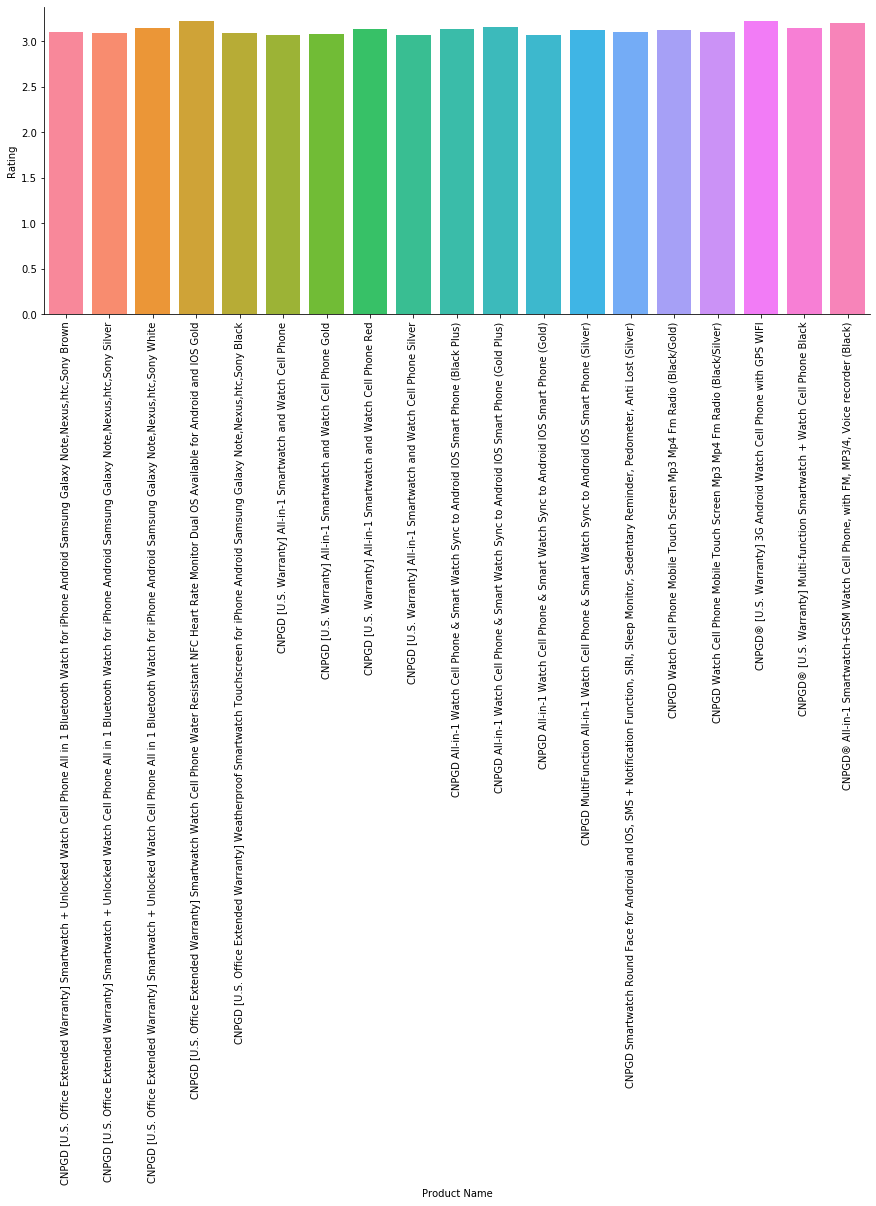

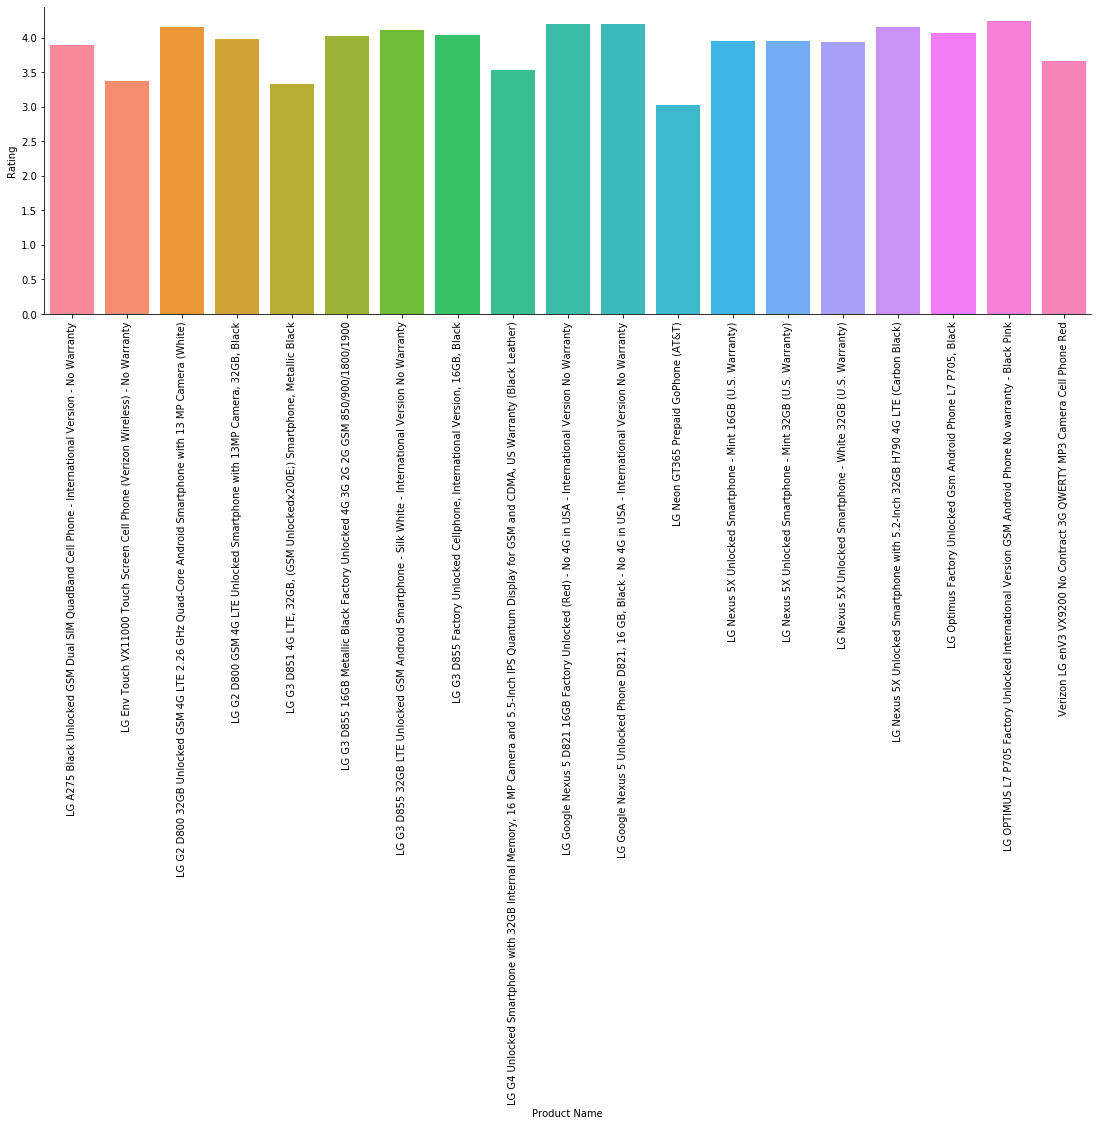

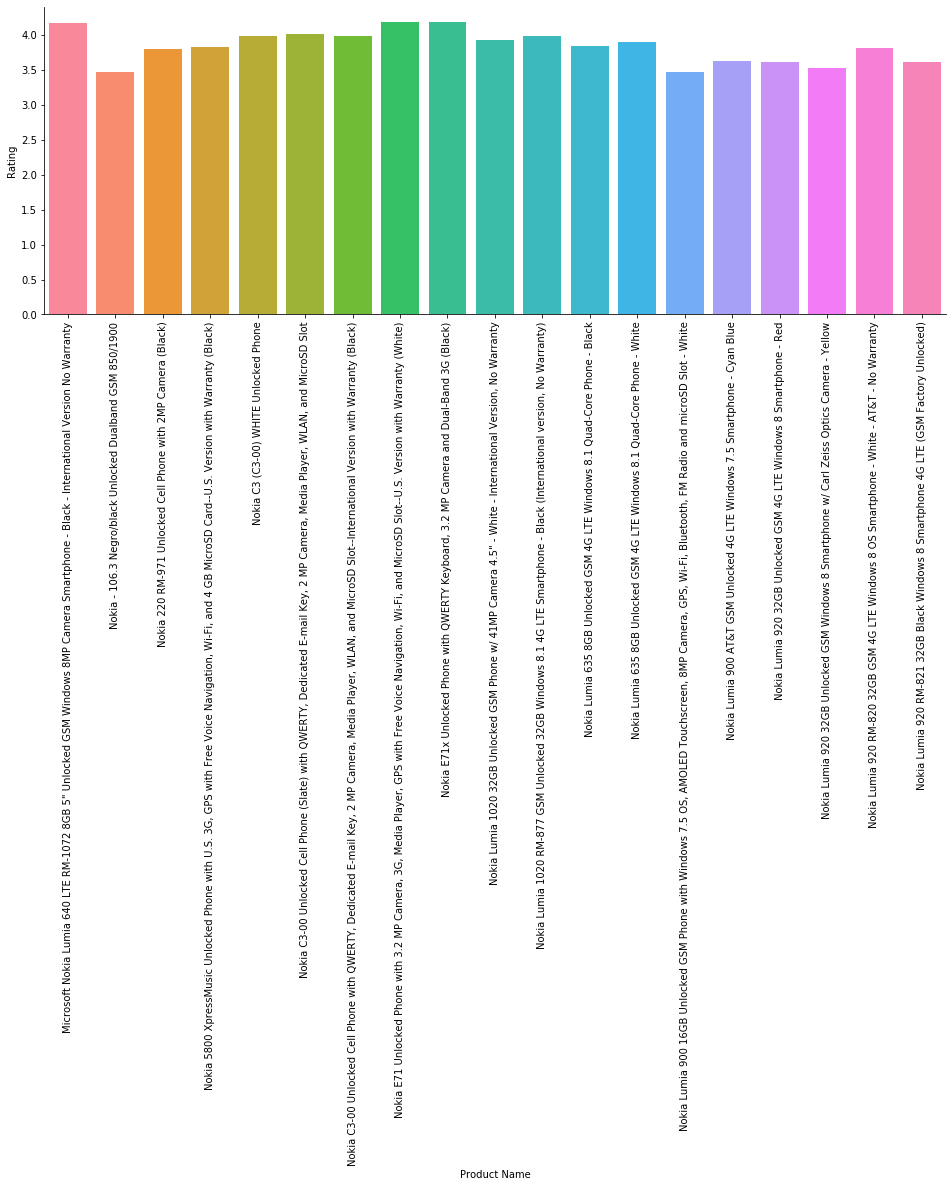

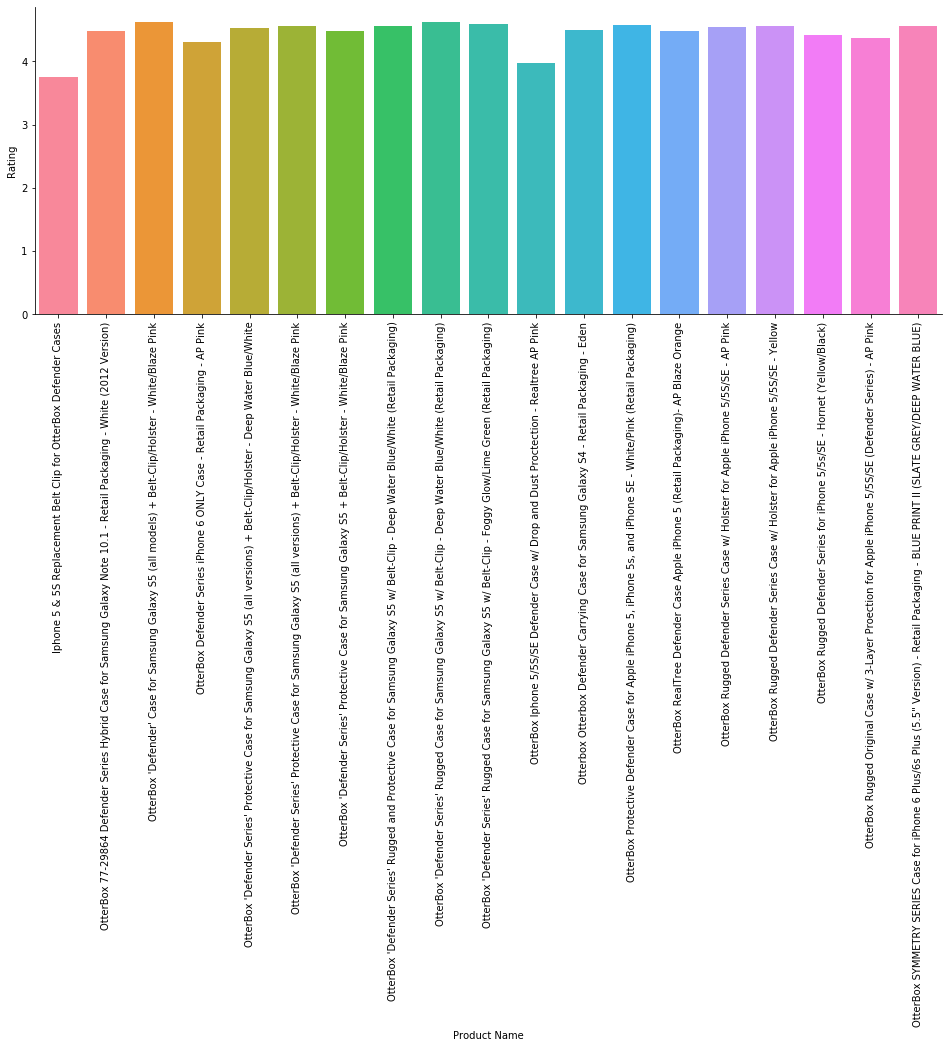

In [44]:
def plot_one_company(company, n=20):
    df_one_company = df_small.loc[df_small['Brand Name'].isin([company])]
    pivot = pd.pivot_table(df_one_company,
            values = ['Rating', 'Review Votes'],
            index =  ['Product Name'],
                       columns= [],
                       aggfunc=[np.sum, np.mean, np.count_nonzero, np.std], 
                       margins=True, fill_value=0).sort_values(by=('count_nonzero', 'Rating'), ascending=False).fillna('')
    top_10_prods = pivot.reindex().head(n=20)
    top_10_prods = top_10_prods.reset_index()
    tt_prods = top_10_prods['Product Name']
    tt_prods2 = tt_prods.reset_index()
    top_10_prods_list = list(set(tt_prods2['Product Name']))
    #top_30_prod_list

    try:
        aa= df_one_company[df_one_company['Product Name'].isin(top_10_prods_list)]
        g = sns.factorplot(x='Product Name', 
                           y='Rating',
                           data=aa, 
                           saturation=1, 
                           kind="bar", 
                           ci=None, 
                           aspect=4, 
                           linewidth=1) 
        locs, labels = plt.xticks()
        plt.setp(labels, rotation=90)
    except: 
        pass
        
for i in top_10_brand_list:
    plot_one_company(i, 20)
    

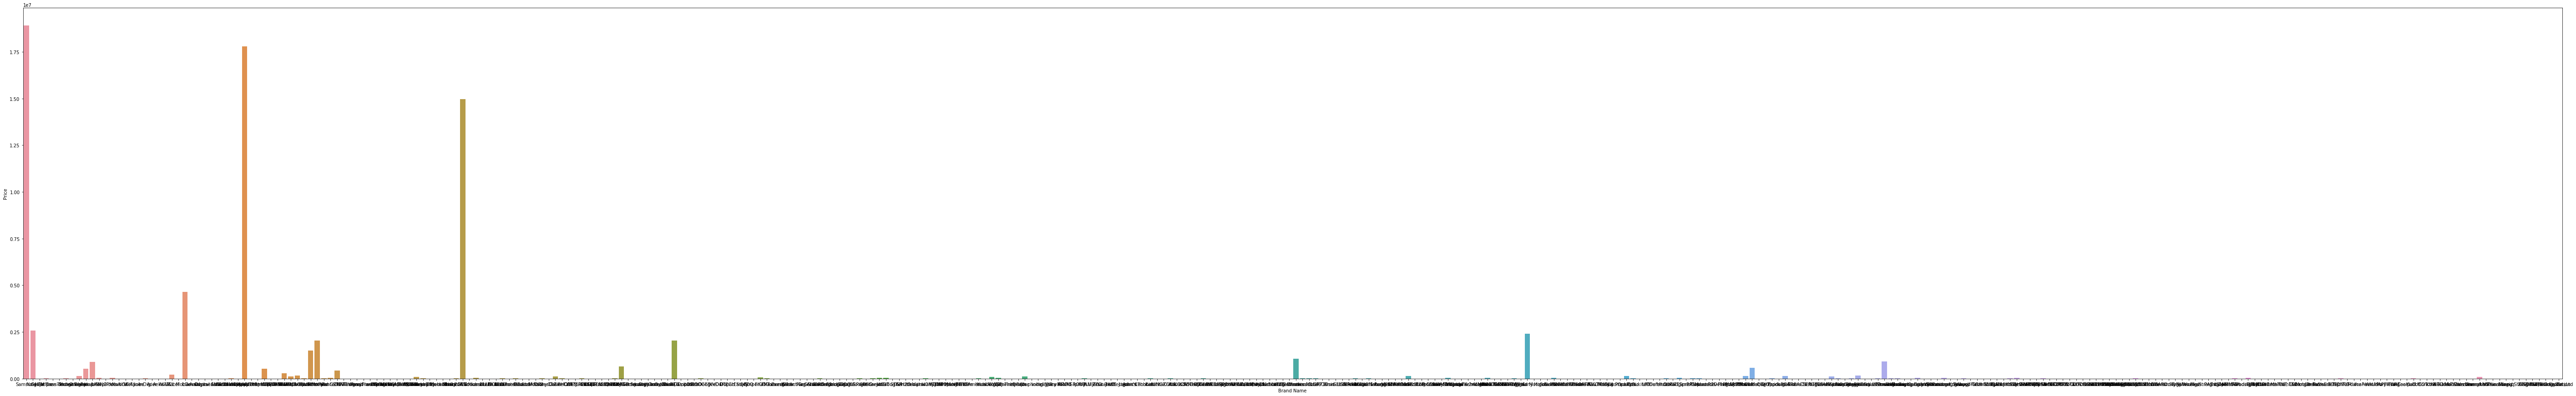

In [9]:
fig = plt.figure(figsize = (100,15))
a=sns.barplot(x = 'Brand Name', y = 'Price', data = mobiledf, estimator = sum, ci = None)
a= mobiledf.sort_values('Brand Name')

In [10]:
import texthero as hero

In [11]:
mobiledf1 = mobiledf1.drop_duplicates('Reviews')
mobiledf2 = mobiledf2.drop_duplicates('Reviews')

In [12]:
# variety_df['variety'].unique()

In [13]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)


In [14]:
mobiledf1['clean_Reviews'] = hero.clean(mobiledf1['Reviews'])
mobiledf2['clean_Reviews'] = hero.clean(mobiledf2['Reviews'])

In [15]:
#create custom pipeline
custom_pipeline = [hero.preprocessing.fillna,
                   hero.preprocessing.lowercase,
                   hero.preprocessing.remove_whitespace,
                   hero.preprocessing.remove_urls
                   ]

In [16]:
mobiledf1['clean_Reviews'] = mobiledf1['Reviews'].pipe(hero.clean, custom_pipeline)
mobiledf2['clean_Reviews'] = mobiledf2['Reviews'].pipe(hero.clean, custom_pipeline)

In [17]:
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

In [18]:
mobiledf1['clean_Reviews'] = mobiledf1['clean_Reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
mobiledf1['clean_Reviews'] = mobiledf1['clean_Reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviewstext = [remove_stopwords(r.split()) for r in mobiledf1['clean_Reviews']]


# make entire text lowercase
reviewstext = [r.lower() for r in reviewstext]


In [19]:
mobiledf2['clean_Reviews'] = mobiledf2['clean_Reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
mobiledf2['clean_Reviews'] = mobiledf2['clean_Reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviewstext2 = [remove_stopwords(r.split()) for r in mobiledf2['clean_Reviews']]

# make entire text lowercase
reviewstext2 = [r.lower() for r in reviewstext2]


In [20]:
import nltk
from nltk import FreqDist
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(12,3))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

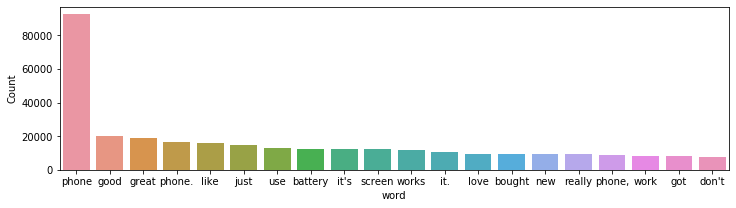

In [21]:
freq_words(reviewstext, 20)

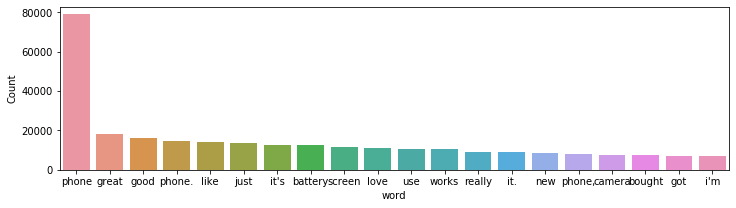

In [22]:
freq_words(reviewstext2, 20)

In [23]:
mobiledf1['clean_Reviews'] = mobiledf1['clean_Reviews'].str.replace("[^a-zA-Z#]", " ")
mobiledf2['clean_Reviews'] = mobiledf2['clean_Reviews'].str.replace("[^a-zA-Z#]", " ")

/Users/yanwuyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/Users/yanwuyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [24]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [25]:
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

In [26]:
mobiledf1['clean_Reviews'] = mobiledf1['clean_Reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviewstext = [remove_stopwords(r.split()) for r in mobiledf1['clean_Reviews']]


# make entire text lowercase
reviewstext = [r.lower() for r in reviewstext]


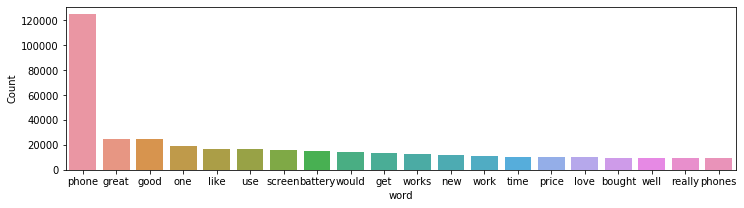

In [27]:
freq_words(reviewstext, 20)

In [28]:
reviewstext

['exelente',
 'phone works great price although got ups ups guy dropped screen door big door',
 'keeping mind sub phone generally advertised cheapest quad core phone landvo turned good phone exceeded expectations research landvo seems new company first model released march took risk although less huge risk buying april reviews available main thing looking powerful inexpensive phone price point battery life also major factor purchased phone basis phone price range time quadcore processor also sports mah battery largest battery price point available models lot things immediately liked phone despite low resolution lack ips screen pretty crisp viewing angles decent battery life also good averaging two days average use full charge one day heavy use would usually put around range still bad also almost shocked build quality phone heavier name brand competition size class weighty solid feel sides metal volume rocker power button creaks everything fits together tightly fit finish top notch beli

In [29]:
mobiledf2['clean_Reviews'] = mobiledf2['clean_Reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviewstext2 = [remove_stopwords(r.split()) for r in mobiledf2['clean_Reviews']]

# make entire text lowercase
reviewstext2 = [r.lower() for r in reviewstext2]

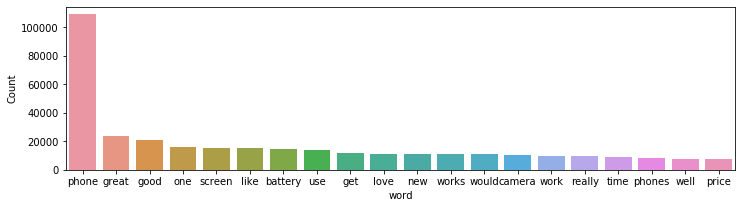

In [30]:
freq_words(reviewstext2, 20)

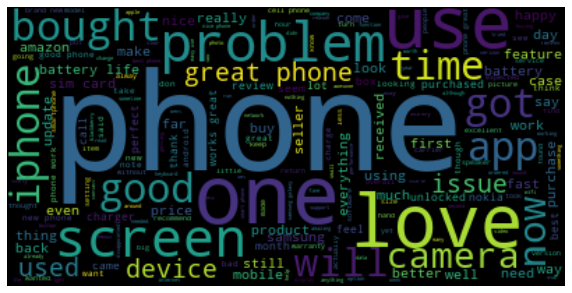

In [31]:
import PIL
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join(review for review in mobiledf2['clean_Reviews'])

wordcloud = WordCloud(background_color="black").generate(text)

text = " ".join(review for review in mobiledf2['clean_Reviews'])

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

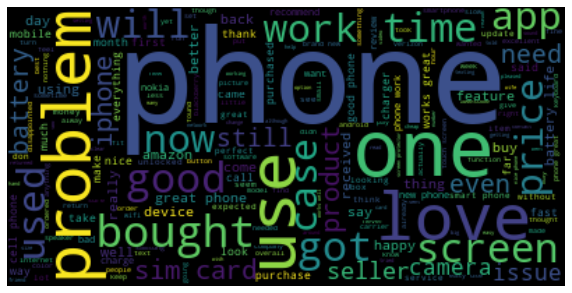

In [45]:
import PIL
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join(review for review in mobiledf1['clean_Reviews'])

wordcloud = WordCloud(background_color="black").generate(text)

text = " ".join(review for review in mobiledf1['clean_Reviews'])

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()